#Library

In [1]:
pip install --upgrade gensim

In [2]:
pip install pyldavis==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136162 sha256=8491fd4f97ea94d66440037148d2376c52a436b102478c63f68251638f7c5f25
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [3]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [4]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=8418648948f1bf08c18f81ae11b8da95ff3edcb4607427f7e105bd563588ac6c
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


#Data

In [5]:
import pandas as pd
import numpy as np
import nltk

import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [6]:
df = pd.read_excel('/content/topic_modelling.xlsx')
df

,twitter
0,@prabowo sedang menjemput takdirnya - @AHMADD...
1,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...
2,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...
3,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...
4,\nDedikasi turunkan angka kematian Ibu dan ba...
...,...
45388,🤣🤣🤣🤣🤣\nEmang bener unfaedah ladenin Akun Lu\n\...
45389,🤩📺 #LALIGAEASPORTS as you've never seen it bef...
45390,🤭\n.\n.\n.\n.\n.\nTakut amir sama @ganjarprano...
45391,🤭🤭\n\n“Dan dengan mendukung Ganjar Pranowo ses...


In [7]:
df.isnull().sum()

twitter    0
dtype: int64

#Preproccess

In [8]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove tab, new line, and backslash
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', '').replace('\\', '')
    # Remove non ASCII characters
    text = text.encode('ascii', 'replace').decode('ascii')
    # Remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove leading and trailing whitespace
    text = text.strip()
    # Remove multiple whitespace into single whitespace
    text = re.sub('\s+', ' ', text)
    # Remove single characters
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # NLTK word tokenize
    tokens = word_tokenize(text)
    return tokens

df['tweet_preprocess'] = df['twitter'].apply(preprocess_text)

print('Preprocessing Result:\n')
print(df['tweet_preprocess'].head())

Preprocessing Result:

0    [sedang, menjemput, takdirnya, katanya, perpol...
1    [tanda, kehormatan, yang, dimiliki, ganjar, pr...
2    [tanda, kehormatan, yang, dimiliki, ganjar, pr...
3    [tanda, kehormatan, yang, dimiliki, ganjar, pr...
4    [dedikasi, turunkan, angka, kematian, ibu, dan...
Name: tweet_preprocess, dtype: object


In [10]:
df

,twitter,tweet_preprocess
0,@prabowo sedang menjemput takdirnya - @AHMADD...,"[sedang, menjemput, takdirnya, katanya, perpol..."
1,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...,"[tanda, kehormatan, yang, dimiliki, ganjar, pr..."
2,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...,"[tanda, kehormatan, yang, dimiliki, ganjar, pr..."
3,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...,"[tanda, kehormatan, yang, dimiliki, ganjar, pr..."
4,\nDedikasi turunkan angka kematian Ibu dan ba...,"[dedikasi, turunkan, angka, kematian, ibu, dan..."
...,...,...
45388,🤣🤣🤣🤣🤣\nEmang bener unfaedah ladenin Akun Lu\n\...,"[emang, bener, unfaedah, ladenin, akun, lu, aw..."
45389,🤩📺 #LALIGAEASPORTS as you've never seen it bef...,"[as, youve, never, seen, it, before, this, is,..."
45390,🤭\n.\n.\n.\n.\n.\nTakut amir sama @ganjarprano...,"[takut, amir, sama, ganjar, tidak, ingin, meng..."
45391,🤭🤭\n\n“Dan dengan mendukung Ganjar Pranowo ses...,"[dan, dengan, mendukung, ganjar, pranowo, sesu..."


In [11]:
# Get stopwords from NLTK for Indonesian
list_stopwords = stopwords.words('indonesian')
english = stopwords.words('english')
# Additional stopwords to append
additional_stopwords = pd.read_csv("/content/stopwords_idnoise.txt", sep=" ")

# Extend the list of stopwords
list_stopwords.extend(additional_stopwords)
list_stopwords.extend(english)

# Convert the list of stopwords to a set for faster lookup
stopwords_set = list(set(list_stopwords))
# Create Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [12]:
def stopword(text):
  #remove stopword
  tokens_without_stopwords = [word for word in text if word not in stopwords_set]
  #sastrawi
  # tweet_stem = stemmer.stem(tokens_without_stopwords)
  tweet_stem = [stemmer.stem(token) for token in tokens_without_stopwords]
  return tweet_stem

df['textdata_stemm'] = df['tweet_preprocess'].apply(stopword)

In [15]:
  df

,twitter,tweet_preprocess,textdata_stemm
0,@prabowo sedang menjemput takdirnya - @AHMADD...,"[sedang, menjemput, takdirnya, katanya, perpol...","[jemput, takdir, politik, indon, semangkin, bi..."
1,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...,"[tanda, kehormatan, yang, dimiliki, ganjar, pr...","[tanda, hormat, milik, ganjar, pranowo]"
2,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...,"[tanda, kehormatan, yang, dimiliki, ganjar, pr...","[tanda, hormat, milik, ganjar, pranowo]"
3,\n5️⃣ tanda Kehormatan yang dimiliki Ganjar P...,"[tanda, kehormatan, yang, dimiliki, ganjar, pr...","[tanda, hormat, milik, ganjar, pranowo]"
4,\nDedikasi turunkan angka kematian Ibu dan ba...,"[dedikasi, turunkan, angka, kematian, ibu, dan...","[dedikasi, turun, angka, mati, bayi, ganjar, p..."
...,...,...,...
45388,🤣🤣🤣🤣🤣\nEmang bener unfaedah ladenin Akun Lu\n\...,"[emang, bener, unfaedah, ladenin, akun, lu, aw...","[emang, bener, unfaedah, ladenin, akun, lu, lu..."
45389,🤩📺 #LALIGAEASPORTS as you've never seen it bef...,"[as, youve, never, seen, it, before, this, is,...","[youve, never, seen, real]"
45390,🤭\n.\n.\n.\n.\n.\nTakut amir sama @ganjarprano...,"[takut, amir, sama, ganjar, tidak, ingin, meng...","[takut, amir, ganjar, kuasa, layan, perguso]"
45391,🤭🤭\n\n“Dan dengan mendukung Ganjar Pranowo ses...,"[dan, dengan, mendukung, ganjar, pranowo, sesu...","[dukung, ganjar, pranowo, sungguh, pkb, efek, ..."


In [16]:
doc_clean = df['textdata_stemm']
doc_clean

0        [jemput, takdir, politik, indon, semangkin, bi...
1                  [tanda, hormat, milik, ganjar, pranowo]
2                  [tanda, hormat, milik, ganjar, pranowo]
3                  [tanda, hormat, milik, ganjar, pranowo]
4        [dedikasi, turun, angka, mati, bayi, ganjar, p...
                               ...                        
45388    [emang, bener, unfaedah, ladenin, akun, lu, lu...
45389                           [youve, never, seen, real]
45390         [takut, amir, ganjar, kuasa, layan, perguso]
45391    [dukung, ganjar, pranowo, sungguh, pkb, efek, ...
45392    [makna, simbol, jempol, telunjuk, jokowi, arah...
Name: textdata_stemm, Length: 45393, dtype: object

#Lda model

In [17]:
import gensim
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [18]:
#dictionary membuat kamus dari daftar dokumen yang sudah diproses.
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)
#membuat matriks dokumen-istilah, yang merepresentasikan frekuensi kata-kata dalam setiap dokumen
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
print(doc_term_matrix)

Dictionary<25769 unique tokens: ['bingung', 'indon', 'jemput', 'koq', 'lawan']...>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# Specify the filename for saving the dictionary
dictionary_filename = "lda_twitter.dict"

# Save the dictionary to the specified file
dictionary.save(dictionary_filename)

In [20]:
#menyimpan corpus
from gensim import corpora

# Simpan doc_term_matrix dalam format Matrix Market (MM)
corpora.MmCorpus.serialize('doc_term_matrix.mm', doc_term_matrix)

In [21]:
from gensim import corpora

def create_lda_inputs(doc_clean):
    # Create a Gensim dictionary
    dictionary = corpora.Dictionary(doc_clean)
    print(dictionary)

    # Generate the document-term matrix
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    return dictionary, doc_term_matrix

# Assuming you have your doc_clean (preprocessed documents) defined
dictionary, doc_term_matrix = create_lda_inputs(doc_clean)

Dictionary<25769 unique tokens: ['bingung', 'indon', 'jemput', 'koq', 'lawan']...>


In [22]:
#kalo make coherence untuk mencari num_topics
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

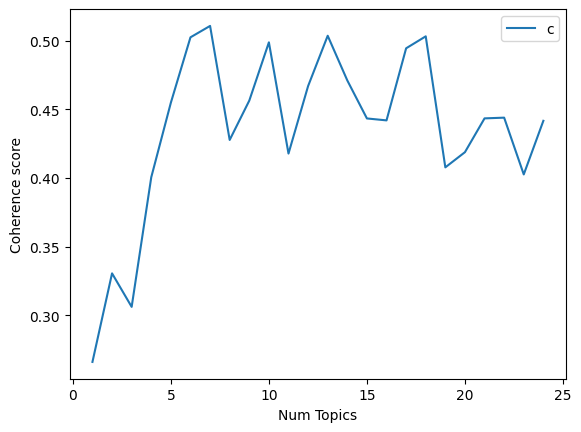

In [23]:
start=1
limit=25
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=doc_term_matrix,
                                                        texts=doc_clean, start=start, limit=limit, step=step)
#show graphs
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.26612
Num Topics = 2  has Coherence Value of 0.330614
Num Topics = 3  has Coherence Value of 0.30622
Num Topics = 4  has Coherence Value of 0.40062
Num Topics = 5  has Coherence Value of 0.454928
Num Topics = 6  has Coherence Value of 0.502527
Num Topics = 7  has Coherence Value of 0.510823
Num Topics = 8  has Coherence Value of 0.427786
Num Topics = 9  has Coherence Value of 0.456434
Num Topics = 10  has Coherence Value of 0.498864
Num Topics = 11  has Coherence Value of 0.417868
Num Topics = 12  has Coherence Value of 0.467025
Num Topics = 13  has Coherence Value of 0.503672
Num Topics = 14  has Coherence Value of 0.471123
Num Topics = 15  has Coherence Value of 0.443439
Num Topics = 16  has Coherence Value of 0.442027
Num Topics = 17  has Coherence Value of 0.494528
Num Topics = 18  has Coherence Value of 0.50324
Num Topics = 19  has Coherence Value of 0.407822
Num Topics = 20  has Coherence Value of 0.418869
Num Topics = 21  has Coherence Va

In [25]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
total_topics = 5 # jumlah topik yang akan di extract
number_words = 5 # jumlah kata per topik

In [26]:
# Running and Trainign LDA model on the document term matrix.
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(corpus = doc_term_matrix, num_topics=total_topics, id2word = dictionary, minimum_probability=0, random_state= 21,alpha= 'symmetric', eta='symmetric')

lda_model.show_topics(num_topics=total_topics, num_words=number_words, formatted= False)

[(0,
  [('prabowo', 0.024848726),
   ('koalisi', 0.022663096),
   ('yg', 0.022616208),
   ('ganjar', 0.019811738),
   ('anies', 0.018127812)]),
 (1,
  [('prabowo', 0.083572306),
   ('subianto', 0.049414206),
   ('ganjar', 0.02944496),
   ('indonesia', 0.01663108),
   ('tni', 0.012032268)]),
 (2,
  [('prabowo', 0.08532738),
   ('pilpres', 0.0533729),
   ('dekade', 0.047996446),
   ('mendingprabowo', 0.047981404),
   ('terusmajubersamaprabowo', 0.047981404)]),
 (3,
  [('negeri', 0.014769954),
   ('subscription', 0.013964755),
   ('deposits', 0.013964755),
   ('losses', 0.013964755),
   ('exceed', 0.013964755)]),
 (4,
  [('prabowo', 0.042253733),
   ('ganjar', 0.03947304),
   ('imin', 0.021847367),
   ('anies', 0.020426255),
   ('dukung', 0.019735182)])]

In [27]:
other = [
['presiden', 'joko', 'widodo', 'pimpin', 'indonesia', 'beliau', 'jabat', 'presiden'],
['pimpin', 'populer', 'inisiatif', 'maju', 'negara', 'bangun', 'infrastruktur', 'program', 'sejahtera', 'sosial', 'reformasi', 'birokrasi'],
['beliau', 'milik', 'visi', 'dorong', 'tumbuh', 'ekonomi', 'atas', 'tantang', 'indonesia'], ['presiden', 'jokowi', 'bicara', 'didik', 'daya', 'masyarakat'],
['indonesia', 'negara', 'pulau', 'besar', 'dunia', 'kaya', 'budaya', 'alam']
          ]

In [28]:
corpus_new = [dictionary.doc2bow(doc) for doc in other]
unsenn = corpus_new[0]
vector = lda_model[unsenn]

In [29]:
lda_model.update(corpus_new)
vector1 = lda_model[unsenn]
print(vector1)

[(0, 0.14071822), (1, 0.79143476), (2, 0.023175519), (3, 0.02224817), (4, 0.022423366)]


/usr/local/lib/python3.10/dist-packages/gensim/models/ldamodel.py:850: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [82]:
from gensim.models.ldamulticore import LdaMulticore
ldan =  LdaMulticore(corpus = doc_term_matrix, num_topics=total_topics, id2word = dictionary, minimum_probability=0, random_state= 22,alpha= 'asymmetric', eta='symmetric' ,
                     workers=4, eval_every=25,minimum_phi_value=0.01)
ldan.show_topics(num_topics=total_topics, num_words=number_words, formatted= False)

[(0,
  [('prabowo', 0.07523222),
   ('ganjar', 0.044702),
   ('subianto', 0.024120085),
   ('dukung', 0.012100734),
   ('anies', 0.012006095)]),
 (1,
  [('prabowo', 0.0226393),
   ('ganjar', 0.021367844),
   ('anies', 0.017039545),
   ('khianat', 0.013504396),
   ('demokrat', 0.011577258)]),
 (2,
  [('ganjar', 0.03097562),
   ('prabowo', 0.020130387),
   ('yg', 0.015278807),
   ('indonesia', 0.010657039),
   ('kerja', 0.008554412)]),
 (3,
  [('prabowo', 0.044684067),
   ('tni', 0.019687323),
   ('polisi', 0.019313533),
   ('september', 0.018609643),
   ('kapolri', 0.017498193)]),
 (4,
  [('mendingprabowo', 0.048787955),
   ('dekade', 0.048751447),
   ('terusmajubersamaprabowo', 0.0487456),
   ('pilpres', 0.047480136),
   ('golkar', 0.034857854)])]

In [51]:
from gensim.models import EnsembleLda
eda = EnsembleLda(corpus = doc_term_matrix,id2word = dictionary, num_topics=10, num_models=4)
print(eda)

In [32]:
#jika fungsi
from gensim.models.ldamodel import LdaModel

def perform_lda(doc_term_matrix, total_topics, dictionary, number_words):
    lda_model = LdaModel(doc_term_matrix, num_topics=total_topics, id2word = dictionary, minimum_probability=0, random_state= 21,alpha= 'symmetric', eta='symmetric')
    topics = lda_model.show_topics(num_topics=total_topics, num_words=number_words, formatted = False)
    return topics

# Assuming you have your doc_term_matrix, total_topics, dictionary, and number_words defined
topics = perform_lda(doc_term_matrix, total_topics, dictionary, number_words)

# Printing the topics
for topic_num, words in topics:
    print(f"Topic {topic_num}: {words}")

Topic 0: [('prabowo', 0.024848726), ('koalisi', 0.022663096), ('yg', 0.022616208), ('ganjar', 0.019811738), ('anies', 0.018127812)]
Topic 1: [('prabowo', 0.083572306), ('subianto', 0.049414206), ('ganjar', 0.02944496), ('indonesia', 0.01663108), ('tni', 0.012032268)]
Topic 2: [('prabowo', 0.08532738), ('pilpres', 0.0533729), ('dekade', 0.047996446), ('mendingprabowo', 0.047981404), ('terusmajubersamaprabowo', 0.047981404)]
Topic 3: [('negeri', 0.014769954), ('subscription', 0.013964755), ('deposits', 0.013964755), ('losses', 0.013964755), ('exceed', 0.013964755)]
Topic 4: [('prabowo', 0.042253733), ('ganjar', 0.03947304), ('imin', 0.021847367), ('anies', 0.020426255), ('dukung', 0.019735182)]


In [83]:
# Compute Perplexity
print('\nPerplexity: ', ldan.log_perplexity(doc_term_matrix))
# a measure of how good the model is. lower the better.


Perplexity:  -7.3766640886135475


In [84]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldan, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4831266202127293


In [ ]:
  # Word Count of Topic Keywords
#melihat word count
from collections import Counter
topics = lda_model.show_topics(num_words=number_words,formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

                       word  topic_id  importance  word_count
0                   prabowo         0    0.024849       30627
1                   koalisi         0    0.022663        3914
2                        yg         0    0.022616        5960
3                    ganjar         0    0.019812       18741
4                     anies         0    0.018128        5842
5                   prabowo         1    0.083572       30627
6                  subianto         1    0.049414        7515
7                    ganjar         1    0.029445       18741
8                 indonesia         1    0.016631        5196
9                       tni         1    0.012032        1218
10                  prabowo         2    0.085327       30627
11                  pilpres         2    0.053373        5587
12                   dekade         2    0.047996        4374
13           mendingprabowo         2    0.047981        4372
14  terusmajubersamaprabowo         2    0.047981        4372
15      

In [ ]:
# def calculate_topic_importance(lda_model, doc_clean):
#     # Word Count of Topic Keywords
#     topics = lda_model.show_topics(formatted=False)
#     data_flat = [w for w_list in doc_clean for w in w_list]
#     counter = Counter(data_flat)

#     out = []
#     for i, topic in topics:
#         for word, weight in topic:
#             out.append([word, i, weight, counter[word]])

#     df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
#     return df_imp_wcount

# # Assuming you have your lda_model and doc_clean (preprocessed documents) defined
# df_importance_wordcount = calculate_topic_importance(lda_model, doc_clean)
# print(df_importance_wordcount)

In [ ]:
from google.colab import drive
drive.mount('drive')

MessageError: ignored

In [ ]:
import json

# Initialize an empty list to store the topics data
topics_data = []

# Group the DataFrame by 'topic_id'
grouped = df_imp_wcount.groupby('topic_id')

# Iterate through each group (topic)
for topic_id, group_data in grouped:
    # Extract the top words, importance, and word count for the topic
    top_words = group_data['word'].tolist()
    importance = group_data['importance'].tolist()
    word_count = group_data['word_count'].tolist()

    # Create a dictionary for the topic
    topic_dict = {
        "topic_id": int(topic_id),
        "top_words": top_words,
        "importance": importance,
        "word_count": word_count
    }

    # Append the topic dictionary to the list of topics
    topics_data.append(topic_dict)

# Create the final JSON structure
output_json = {
    "topics": topics_data
}

# Convert the JSON structure to a JSON-formatted string
json_string = json.dumps(output_json, indent=4)

# Save the JSON to a file (optional)
with open('lda_topic_data_twit.json', 'w') as json_file:
    json_file.write(json_string)

# # Print the JSON string
# print(json_string)


In [ ]:
#simpan ke google drive
df_imp_wcount.to_csv('df_imp_wcount2.csv')
!cp df_imp_wcount.csv "drive/My Drive/Colab Notebooks/LDA Indonesia/"
# #jika simpan ke local drive
# filedisimpan='df_imp_wcount.xlsx'
# df_imp_wcount.to_excel(filedisimpan, index = False, header=True)

cp: cannot stat 'df_imp_wcount.csv': No such file or directory


In [ ]:
filedisimpan='df_imp_wcountnew.xlsx'
df_imp_wcount.to_excel(filedisimpan, index = False, header=True)

In [ ]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=dictionary):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,number_words)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=df['twitter'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic = df_dominant_topic[['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']]
print(df_dominant_topic.head(10))

   Dominant_Topic  Topic_Perc_Contrib  \
0               0              0.6361   
1               2              0.8646   
2               2              0.8646   
3               2              0.8646   
4               2              0.7742   
5               4              0.4840   
6               4              0.4839   
7               4              0.4917   
8               4              0.4917   
9               2              0.9186   

                                            Keywords  \
0                prabowo, koalisi, yg, ganjar, anies   
1  prabowo, pilpres, dekade, mendingprabowo, teru...   
2  prabowo, pilpres, dekade, mendingprabowo, teru...   
3  prabowo, pilpres, dekade, mendingprabowo, teru...   
4  prabowo, pilpres, dekade, mendingprabowo, teru...   
5               prabowo, ganjar, imin, anies, dukung   
6               prabowo, ganjar, imin, anies, dukung   
7               prabowo, ganjar, imin, anies, dukung   
8               prabowo, ganjar, imin, anies

In [ ]:
import json

# Create an empty dictionary for topics
topics_dict = {}

# Iterate through each row in the DataFrame to build the topics dictionary
for index, row in df_dominant_topic.iterrows():
    dominant_topic = int(row['Dominant_Topic'])
    keywords = row['Keywords']

    # Split keywords into a list
    keyword_list = keywords.split(', ')

    # Create a dictionary entry for the topic
    topics_dict[dominant_topic] = keyword_list

# Create an empty list to store the topics data
topics_data = []

# Iterate through each row in the DataFrame
for index, row in df_dominant_topic.iterrows():
    # Extract relevant information from the row
    # document_no = int(row['Document_No'])
    dominant_topic = int(row['Dominant_Topic'])
    topic_perc_contrib = row['Topic_Perc_Contrib']
    text = row['Text']

    # Create a dictionary for the row
    row_dict = {
        # "Document_No": document_no,
        "Dominant_Topic": dominant_topic,
        "Topic_Perc_Contrib": topic_perc_contrib,
        "Text": text
    }

    # Append the row dictionary to the list of topics data
    topics_data.append(row_dict)

# Create the final JSON structure
output_json = {
    "topic": topics_dict,
    "topics_data": topics_data
}

# Convert the JSON structure to a JSON-formatted string with indentation
json_string = json.dumps(output_json, indent=4)

# Print the JSON string or save it to a file (optional)
with open('testxx.json', 'w') as json_file:
    json_file.write(json_string)

# Print the JSON string
print(json_string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#simpan ke google drive
df_dominant_topic.to_csv('df_dominant_topic1.csv')
!cp df_dominant_topic.csv "drive/My Drive/Colab Notebooks/LDA Indonesia/"

cp: cannot stat 'df_dominant_topic.csv': No such file or directory


In [ ]:
#jika simpan ke local drive
filedisimpan='df_dominant_topicnew.xlsx'
df_dominant_topic.to_excel(filedisimpan, index = False, header=True)

In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [ ]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = doc_term_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# proses ini mungkin agak lama
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_preparedcoba2_'+ str(total_topics) +'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# proses ini mungkin agak lama
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.128268  0.137548       1        1  24.366130
2      0.123517  0.190854       2        1  22.255249
0      0.061548 -0.208322       3        1  21.889560
4      0.092517 -0.154764       4        1  21.254112
3     -0.405850  0.034684       5        1  10.234949, topic_info=                          Term         Freq        Total Category  logprob  \
12689                   dekade  6020.000000  6020.000000  Default  30.0000   
12691           mendingprabowo  6018.000000  6018.000000  Default  29.0000   
12692  terusmajubersamaprabowo  6018.000000  6018.000000  Default  28.0000   
245                    pilpres  7064.000000  7064.000000  Default  27.0000   
174                   subianto  8221.000000  8221.000000  Default  26.0000   
...                        ...          ...          ...      ...      ...   
17513                    linyi   296.633814   305.110076   Topic5  -5.2667   
8649                     today   441.550925   537.481040   Topic5  -4.8689   
356                       yati   388.924568   488.179908   Topic5  -4.9958   
29                      jateng   373.587786  1135.605199   Topic5  -5.0360   
312                      kerja   357.156494   846.647278   Topic5  -5.0810   

       loglift  
12689  30.0000  
12691  29.0000  
12692  28.0000  
245    27.0000  
174    26.0000  
...        ...  
17513   2.2512  
8649    2.0828  
356     2.0521  
29      1.1676  
312     1.4163  

[319 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
1175       3  0.002902           abis
1175       4  0.998319           abis
17710      5  0.997981  advertisement
5154       1  0.003534          agama
5154       2  0.007068          agama
...      ...       ...            ...
5327       4  0.997946         yusril
357        1  0.998502           zoro
2936       1  0.996767       zulkifli
2936       2  0.001367       zulkifli
2936       4  0.001367       zulkifli

[643 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 4])

In [ ]:
from gensim.test.utils import datapath

In [ ]:
ldan.save("/content/model/lda_mutlticore")

In [ ]:
!zip -r '/content/model_ldamulticore.zip' '/content/model' '/content/lda_topic_data_twit.json' '/content/json_fix_fe.json'

  adding: content/model/ (stored 0%)
  adding: content/model/lda_mutlticore.expElogbeta.npy (deflated 23%)
  adding: content/model/lda_mutlticore.id2word (deflated 48%)
  adding: content/model/lda_mutlticore.state (deflated 31%)
  adding: content/model/lda_mutlticore (deflated 96%)


In [ ]:
import shutil
shutil.copy("/content/model_lda.zip","/content/drive/My Drive/model_lda.zip")

In [ ]:
!zip -r LDa_model1.zip '/content/model'  '/content/doc_term_matrix.mm' '/content/doc_term_matrix.mm.index' '/content/lda_topic_data1.json' '/content/lda_topic_sents_keywordsfix.json' '/content/lda_v1.dict' '/content/ldavis_prepared_5' '/content/ldavis_preparedcoba2_5.html' '/content/lda_topic_sents_keywords4.json'

  adding: content/model/ (stored 0%)
  adding: content/model/lda_model1.id2word (deflated 47%)
  adding: content/model/lda_model2.state (deflated 32%)
  adding: content/model/lda_model2.expElogbeta.npy (deflated 27%)
  adding: content/model/lda_model1 (deflated 28%)
  adding: content/model/lda_model2 (deflated 96%)
  adding: content/model/lda_model1.state (deflated 32%)
  adding: content/model/lda_model1.expElogbeta.npy (deflated 27%)
  adding: content/model/lda_model2.id2word (deflated 47%)
  adding: content/doc_term_matrix.mm (deflated 73%)
  adding: content/doc_term_matrix.mm.index (deflated 57%)
  adding: content/lda_topic_data1.json (deflated 79%)
  adding: content/lda_topic_sents_keywordsfix.json (deflated 86%)
  adding: content/lda_v1.dict (deflated 47%)
  adding: content/ldavis_prepared_5 (deflated 49%)
  adding: content/ldavis_preparedcoba2_5.html (deflated 61%)
  adding: content/lda_topic_sents_keywords4.json (deflated 90%)


#Buat x dan Y


In [85]:
 #dapatkan vector untuk x dan y
hm = np.array([[y for (x,y) in ldan[doc_term_matrix[i]]] for i in range(len(doc_term_matrix))])

In [86]:
arr = pd.DataFrame(hm).fillna(0).values
print(arr)

[[0.3365588  0.21959741 0.01622919 0.01304862 0.414566  ]
 [0.8875546  0.03918074 0.02963844 0.02372514 0.0199011 ]
 [0.88753223 0.0391816  0.02965991 0.02372515 0.0199011 ]
 ...
 [0.23861766 0.03456697 0.6889038  0.02063522 0.01727634]
 [0.9703486  0.0105337  0.00770659 0.00621739 0.00519371]
 [0.8578403  0.01621277 0.01212072 0.10565128 0.00817495]]


In [87]:
topic_num = np.argmax(arr, axis=1)

In [88]:
from sklearn.manifold import TSNE
# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=21, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45393 samples in 0.044s...
[t-SNE] Computed neighbors for 45393 samples in 1.424s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45393
[t-SNE] Computed conditional probabilities for sample 2000 / 45393
[t-SNE] Computed conditional probabilities for sample 3000 / 45393
[t-SNE] Computed conditional probabilities for sample 4000 / 45393
[t-SNE] Computed conditional probabilities for sample 5000 / 45393
[t-SNE] Computed conditional probabilities for sample 6000 / 45393
[t-SNE] Computed conditional probabilities for sample 7000 / 45393
[t-SNE] Computed conditional probabilities for sample 8000 / 45393
[t-SNE] Computed conditional probabilities for sample 9000 / 45393
[t-SNE] Computed conditional probabilities for sample 10000 / 45393
[t-SNE] Computed conditional probabilities for sample 11000 / 45393
[t-SNE] Computed conditional probabilities for sample 12000 / 45393
[t-SNE] Computed conditional probabilities for sam

In [ ]:
# Create a scatter plot
x = tsne_lda[:, 0]
y = tsne_lda[:, 1]
coordinatess = pd.DataFrame({'X': x, 'Y': y})
print(coordinatess)

               X          Y
0      -8.687819 -57.062138
1      72.988510 -10.524686
2      73.000114 -10.509759
3      73.015038 -10.493280
4      38.284565  72.659348
...          ...        ...
45388 -39.411575 -29.261236
45389  20.492243  42.112637
45390 -31.101433 -59.292374
45391 -15.715078  13.391023
45392  49.562618  47.382351

[45393 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

def perform_tsne(lda_model, doc_term_matrix):
    # Create a matrix of topic contributions
    hm = np.array([[y for (x,y) in lda_model[doc_term_matrix[i]]] for i in range(len(doc_term_matrix))])
    # Convert to DataFrame and fill NaN values with 0
    arr = pd.DataFrame(hm).fillna(0).values

    # Perform t-SNE dimension reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=21, angle=.99, init='pca',  perplexity=5)
    tsne_lda = tsne_model.fit_transform(arr)

    #coordinates
    x = tsne_lda[:, 0]
    y = tsne_lda[:, 1]
    coordinatess = pd.DataFrame({'X': x, 'Y': y})

    return coordinatess

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tsne_lda = perform_tsne(lda_model, doc_term_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 45393 samples in 0.033s...
[t-SNE] Computed neighbors for 45393 samples in 0.466s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45393
[t-SNE] Computed conditional probabilities for sample 2000 / 45393
[t-SNE] Computed conditional probabilities for sample 3000 / 45393
[t-SNE] Computed conditional probabilities for sample 4000 / 45393
[t-SNE] Computed conditional probabilities for sample 5000 / 45393
[t-SNE] Computed conditional probabilities for sample 6000 / 45393
[t-SNE] Computed conditional probabilities for sample 7000 / 45393
[t-SNE] Computed conditional probabilities for sample 8000 / 45393
[t-SNE] Computed conditional probabilities for sample 9000 / 45393
[t-SNE] Computed conditional probabilities for sample 10000 / 45393
[t-SNE] Computed conditional probabilities for sample 11000 / 45393
[t-SNE] Computed conditional probabilities for sample 12000 / 45393
[t-SNE] Computed conditional probabilities for sam

In [ ]:
print(coordinatess)

               X          Y
0      -8.687819 -57.062138
1      72.988510 -10.524686
2      73.000114 -10.509759
3      73.015038 -10.493280
4      38.284565  72.659348
...          ...        ...
45388 -39.411575 -29.261236
45389  20.492243  42.112637
45390 -31.101433 -59.292374
45391 -15.715078  13.391023
45392  49.562618  47.382351

[45393 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 # Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
from sklearn.manifold import TSNE
import seaborn as sns
# Bokeh

from bokeh.plotting import figure, show,output_notebook
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider, Label
from bokeh.layouts import column
from bokeh.palettes import all_palettes
from matplotlib import colors as mcolors
output_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              min_width=900, min_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvalidIndexError: ignored

In [ ]:
from bokeh.models import Legend, LegendItem
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), min_width=900, min_height=700)

# Create legend items for each topic
legend_items = []
for i in range(n_topics):
    scatter = plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[i], legend_label=f"Topic {i}")
    legend_items.append(LegendItem(label=f"Topic {i}", renderers=[scatter]))

# Add the legend to the plot
legend = Legend(items=legend_items)
plot.add_layout(legend, 'right')

show(plot)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvalidIndexError: ignored

In [ ]:
import json
import pandas as pd
from sklearn.manifold import TSNE


# Create an empty dictionary for topics
topics_dict = {}

# Iterate through each row in the DataFrame to build the topics dictionary
for index, row in df_dominant_topic.iterrows():
    dominant_topic = int(row['Dominant_Topic'])
    keywords = row['Keywords']

    # Split keywords into a list
    keyword_list = keywords.split(', ')

    # Create a dictionary entry for the topic
    topics_dict[dominant_topic] = keyword_list

# Create an empty list to store the topics data
topics_data = []

# Iterate through each row in the DataFrame
for index, row in df_dominant_topic.iterrows():
    # Extract relevant information from the row
    # document_no = int(row['Document_No'])
    dominant_topic = int(row['Dominant_Topic'])
    topic_perc_contrib = float(row['Topic_Perc_Contrib'])
    text = row['Text']

    # Create a dictionary for the row
    row_dict = {
        "x": float(x[index]),  # Add X coordinate
        "y": float(y[index]),  # Add Y coordinate
        "Dominant_Topic": dominant_topic,
        "Topic_Perc_Contrib": topic_perc_contrib,
        "Text": text
    }

    # Append the row dictionary to the list of topics data
    topics_data.append(row_dict)


# Create the final JSON structure
output_json = {
    "topic": topics_dict,
    "topics_data": topics_data
}

# Convert the JSON structure to a JSON-formatted string with indentation
json_string = json.dumps(output_json, indent=4)

# Print the JSON string or save it to a file (optional)
with open('json_fix_fe.json', 'w') as json_file:
    json_file.write(json_string)

# Print the JSON string
print(json_string)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
lda_model12 = LdaModel.load('/content/model/lda_model3')

In [ ]:
import pandas as pd

df1 = pd.read_excel('/content/DATATOPICMODELLING.xlsx')

In [ ]:
dictionaryx = Dictionary.load('/content/model/lda_model3.id2word')

In [ ]:
# Assuming that your DataFrame has a column named 'text' that contains the text data
for index, row in df1.iterrows():
    # Get the text from the 'text' column
    text = row['Tweet']

    # Preprocess the text
    tokens = preprocess_text(text)
    tweet_stem = stopword(tokens)

    # Create a bag-of-words representation
    bow = dictionaryx.doc2bow(tweet_stem)

    # Predict topics for the document
    topics = lda_model12.get_document_topics(bow)

    # Print or store the topics and their probabilities
    for topic, prob in topics:
        print(f"Document {index}, Topic {topic}: Probability {prob}")


Document 0, Topic 0: Probability 0.4239238500595093
Document 0, Topic 1: Probability 0.051862578839063644
Document 0, Topic 2: Probability 0.11503760516643524
Document 0, Topic 3: Probability 0.008604073897004128
Document 0, Topic 4: Probability 0.40057191252708435
Document 1, Topic 0: Probability 0.29773199558258057
Document 1, Topic 1: Probability 0.013599191792309284
Document 1, Topic 2: Probability 0.013519106432795525
Document 1, Topic 3: Probability 0.013344219885766506
Document 1, Topic 4: Probability 0.6618055105209351
Document 2, Topic 0: Probability 0.26053425669670105
Document 2, Topic 1: Probability 0.02925868332386017
Document 2, Topic 2: Probability 0.029787927865982056
Document 2, Topic 3: Probability 0.02861834317445755
Document 2, Topic 4: Probability 0.651800811290741
Document 3, Topic 0: Probability 0.3702223300933838
Document 3, Topic 1: Probability 0.4955495595932007
Document 3, Topic 2: Probability 0.013954702764749527
Document 3, Topic 3: Probability 0.0136529095